In [7]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 读取数据
df = pd.read_csv('Shill Bidding Dataset.csv')

# 2. 仅保留正常竞拍记录
df_normal = df[df['Class'] == 0]

# 3. 提取用户行为特征
selected_features = [
    'Bidder_Tendency', 'Bidding_Ratio', 'Successive_Outbidding',
    'Last_Bidding', 'Early_Bidding', 'Winning_Ratio'
]
user_df = df_normal.groupby('Bidder_ID')[selected_features].mean()

| 特征名                      | 说明              | 是否用于聚类 | 说明              |
| ------------------------ | --------------- | - | --------------- |
| `Bidder_Tendency`        | 用户投标频率（相对于总拍卖数） | ✅ | 衡量参与度           |
| `Bidding_Ratio`          | 用户出价次数 / 拍卖总出价数 | ✅ | 衡量出价主动性         |
| `Successive_Outbidding`  | 用户是否连续压价自己      | ✅ | 衡量激进或刷数据倾向      |
| `Last_Bidding`           | 是否倾向于最后出价       | ✅ | 衡量策略：谨慎/激进      |
| `Early_Bidding`          | 是否在拍卖早期出价       | ✅ | 与上面相反，衡量性格      |
| `Winning_Ratio`          | 赢得拍卖的比例         | ✅ | 衡量有效性           |
| `Auction_Duration`       | 所参拍拍卖的平均持续时长    | ❌ | 用处较小，非行为特征      |
| `Starting_Price_Average` | 起拍价均值           | ❌ | 容易引入偏差          |
| `Auction_Bids`           | 所参与拍卖中出价总数      | ❌ | 拍卖层级特征，不是用户本身行为 |


In [8]:
# 4. 标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(user_df)

# 5. 聚类
kmeans = KMeans(n_clusters=3, random_state=42)
user_df['Cluster'] = kmeans.fit_predict(X_scaled)

In [9]:
# 6. 聚类中心解释
print(user_df.groupby('Cluster').mean())

         Bidder_Tendency  Bidding_Ratio  Successive_Outbidding  Last_Bidding  \
Cluster                                                                        
0               0.220563       0.077620               0.015678      0.681294   
1               0.190037       0.086992               0.005960      0.235508   
2               0.439354       0.188598               0.045727      0.297890   

         Early_Bidding  Winning_Ratio  
Cluster                                
0             0.658644       0.216663  
1             0.218311       0.196757  
2             0.267043       0.720579  


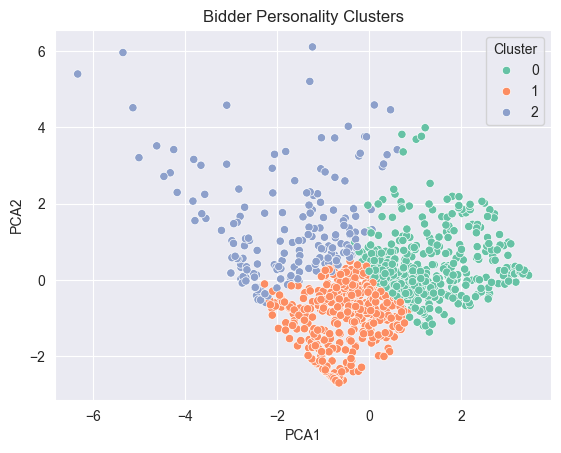

In [10]:
# 7. 可视化
from sklearn.decomposition import PCA
X_pca = PCA(n_components=2).fit_transform(X_scaled)
user_df['PCA1'], user_df['PCA2'] = X_pca[:, 0], X_pca[:, 1]

sns.scatterplot(data=user_df, x='PCA1', y='PCA2', hue='Cluster', palette='Set2')
plt.title("Bidder Personality Clusters")
plt.show()

🟦 Cluster 0 — 保守型用户

    出价倾向低中（0.22），频率也低（0.077）

    抬价不多（0.015），但有很强的**“后期出价”行为**（Last_Bidding = 0.68）

    Early_Bidding 极高（0.66）→ 表明行为两极：早早挂单+最后猛出一次

    胜率低（0.216）

📌 性格标签：保守型
🧠 解释： 谨慎但“懂套路”，不喜欢频繁出价，但会一开始观察、最后冲刺。
🟨 Cluster 1 — 正常型用户

    各项都偏低或中规中矩（如 Bidder_Tendency = 0.19, Bidding_Ratio = 0.087）

    出价时间偏早（Last_Bidding = 0.235），Early_Bidding 也较低（0.218）

    胜率最低（0.196）

📌 性格标签：正常型
🧠 解释： 参与不深、出价中庸，属于典型“随缘买家”——尝试参与但不执着，行为没有明确策略。
🟥 Cluster 2 — 激进型用户

    所有“积极行为”指标最高：出价倾向（0.44）、频率（0.188）、连续抬价（0.045）

    胜率遥遥领先（0.720）说明非常成功

    出价时间中间偏后期，早期出价也适中

📌 性格标签：激进型
🧠 解释： 参与度高、行为明显，具有目标性与竞争欲，属于真正“争抢型”的高强度竞拍者。

聚类数（不含噪声）: 4
噪声点数量: 33

每类聚类的平均特征值：
                 Bidder_Tendency  Bidding_Ratio  Successive_Outbidding  \
HDBSCAN_Cluster                                                          
-1                      0.659663       0.227535               0.264899   
 0                      1.000000       0.199907               0.000000   
 1                      0.165431       0.094023               0.009766   
 2                      1.000000       0.089522               0.000000   
 3                      1.000000       0.062633               0.000000   

                 Last_Bidding  Early_Bidding  Winning_Ratio  
HDBSCAN_Cluster                                              
-1                   0.405504       0.317033       0.255628  
 0                   0.433322       0.386296       1.000000  
 1                   0.427939       0.408825       0.285054  
 2                   0.051114       0.037829       0.000000  
 3                   0.836627       0.835557       0.000000  


C:\Users\Hastu\anaconda3\envs\NIS3317\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Hastu\anaconda3\envs\NIS3317\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


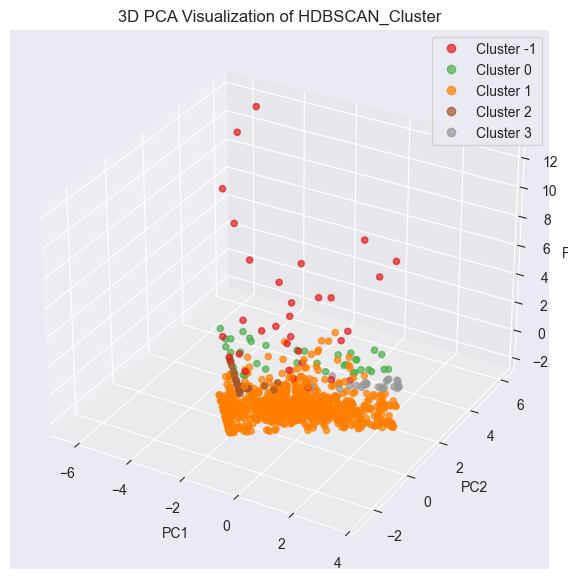

In [19]:
import pandas as pd
import hdbscan
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# 5. HDBSCAN 聚类
clusterer = hdbscan.HDBSCAN(min_cluster_size=10, min_samples=5)
user_df['HDBSCAN_Cluster'] = clusterer.fit_predict(X_scaled)

# 6. 查看聚类数量和噪声点数量
n_clusters = len(set(user_df['HDBSCAN_Cluster'])) - (1 if -1 in user_df['HDBSCAN_Cluster'].values else 0)
n_noise = list(user_df['HDBSCAN_Cluster']).count(-1)

print(f"聚类数（不含噪声）: {n_clusters}")
print(f"噪声点数量: {n_noise}")
print("\n每类聚类的平均特征值：")
print(user_df.groupby('HDBSCAN_Cluster')[selected_features].mean())

from sklearn.decomposition import PCA

# 对数据进行 3 维 PCA 降维
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # 必须引入

# 新建 3D 图形
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# 绘制散点图，按 GMM 聚类标签着色
scatter = ax.scatter(
    X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2],
    c=user_df['HDBSCAN_Cluster'],  # 或其他聚类结果，如 KMeans_Cluster
    cmap='Set1', s=20, alpha=0.7
)

# 设置标签
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("3D PCA Visualization of HDBSCAN_Cluster")

# 添加图例
legend_labels = [f"Cluster {i}" for i in sorted(user_df['HDBSCAN_Cluster'].unique())]
plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels)
plt.show()




GMM 聚类结果（每类用户的平均特征）:
             Bidder_Tendency  Bidding_Ratio  Successive_Outbidding  \
GMM_Cluster                                                          
0                   0.290056       0.056847               0.004556   
1                   0.205654       0.101976               0.021345   
2                   0.491829       0.169065               0.006410   

             Last_Bidding  Early_Bidding  Winning_Ratio  
GMM_Cluster                                              
0                0.800816       0.797287       0.032187  
1                0.363618       0.337708       0.263982  
2                0.334255       0.312905       0.983654  


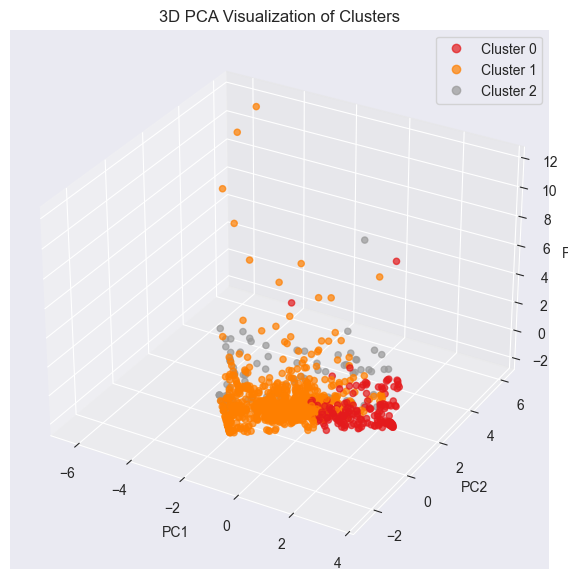

In [18]:
from sklearn.mixture import GaussianMixture

# 5. 高斯混合模型聚类，指定 3 类
gmm = GaussianMixture(n_components=3, covariance_type='tied', random_state=42)
user_df['GMM_Cluster'] = gmm.fit_predict(X_scaled)

# 6. 查看每类的平均特征，用于分析性格
print("\nGMM 聚类结果（每类用户的平均特征）:")
print(user_df.groupby('GMM_Cluster')[selected_features].mean())

from sklearn.decomposition import PCA

# 对数据进行 3 维 PCA 降维
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # 必须引入

# 新建 3D 图形
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# 绘制散点图，按 GMM 聚类标签着色
scatter = ax.scatter(
    X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2],
    c=user_df['GMM_Cluster'],  # 或其他聚类结果，如 KMeans_Cluster
    cmap='Set1', s=20, alpha=0.7
)

# 设置标签
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("3D PCA Visualization of Clusters")

# 添加图例
legend_labels = [f"Cluster {i}" for i in sorted(user_df['GMM_Cluster'].unique())]
plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels)
plt.show()

